# String Selection Charts for Case Studies

In [1]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
# enable plots to be shown in cells
%matplotlib inline

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings
       with thanks to Alex Williams, see: 
       https://stackoverflow.com/questions/38208700/matplotlib-plot-lines-with-colors-through-colormap

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax
    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)
    # set coloring of line segments
    lc.set_array(np.asarray(c))
    # add lines to axes and rescale 
    ax.add_collection(lc)
    ax.autoscale()
    return lc

chart_x_range = np.arange(1,300,1)  # alpha range for contours and damping constraints
lamda_threshold = 0.05              # lambda threshold value for damping constraint
default_overtones = 10              # number of overtones for damping constraint

def base_string_chart(rho):
    fig, ax = plt.subplots(figsize=(10,8))
    pi_rho = rho * np.pi
    #
    # tension contours
    tarray = np.arange(10, 305, 10)
    n_lines = len(tarray)
    xs = np.array([chart_x_range for i in range(n_lines)])
    ys = np.array([1000.0*np.sqrt(tension/pi_rho)/chart_x_range for tension in tarray])
    lc = multiline(xs, ys, tarray, cmap='copper', lw=1)
    #
    # impedance contours
    for Z0 in [0.08, 0.2, 0.4, 0.8]:
        y = 1000.0 * np.sqrt(2.0 * Z0 / (pi_rho * chart_x_range))
        ax.plot(chart_x_range, y, ls='--', color='magenta', lw=1)
    #
    # colourbar
    axcb = fig.colorbar(lc)
    axcb.set_label('Tension (N)')
    # axes
    ax.axis([0, 280, 0, 3])
    ax.set_xlabel('$\\alpha$')
    ax.set_ylabel("Diameter (mm)")
    #
    return ax

def add_damping_limit(ax, length, rho, E0, E1, overtones, colour, style):
    lambda_adj = lamda_threshold / (1.0 - lamda_threshold)  ## allows form of eq.(7) to be used in place of eq.(4)
    E = E0 + (E1 * 4.0 * chart_x_range * chart_x_range * rho)  # Young's modulus in Pa
    y = 8000.0 * length * chart_x_range * np.sqrt(lambda_adj * rho / E) / (np.pi * overtones)
    ax.plot(chart_x_range, y, ls=style, color=colour, lw=1)

def add_harp_damping_limit(ax, length_arr, freq_arr, rho, E0, E1, overtones, colour, style, mkr, msize, mkredge):
    lambda_adj = lamda_threshold / (1.0 - lamda_threshold)  ## allows form of eq.(7) to be used in place of eq.(4)
    x_array = np.asarray(length_arr) * np.asarray(freq_arr)
    E = E0 + (E1 * 4.0 * x_array * x_array * rho)  # Young's modulus in Pa
    y_array = 8000.0 * length_arr * x_array * np.sqrt(lambda_adj * rho / E) / (np.pi * overtones)
    ax.plot(x_array, y_array, ls=style, color=colour, marker=mkr, ms=msize, mew=mkredge)


## Lute case study

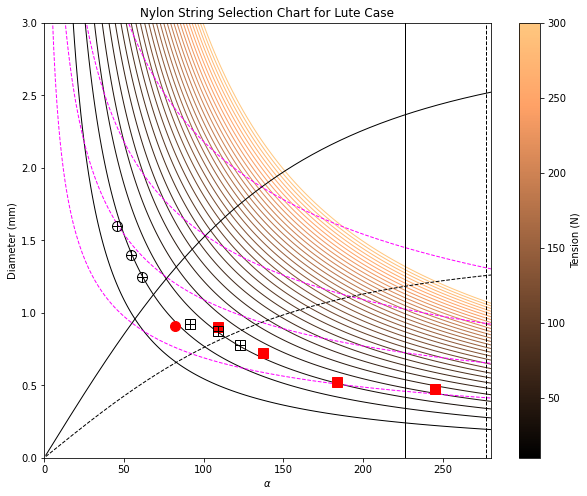

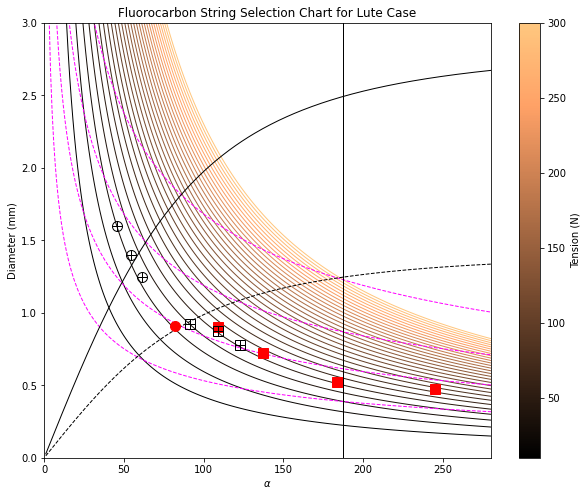

In [2]:
def add_lute_strings(ax):
    msize=10
    ax.plot(0.625*392.0, 0.475, 'rs', mfc='r', ms=msize) # course 1, nylon
    ax.plot(0.625*293.7, 0.525, 'rs', mfc='r', ms=msize) # course 2, nylon
    ax.plot(0.625*220.0, 0.725, 'rs', mfc='r', ms=msize) # course 3, nylon
    ax.plot(0.625*174.6, 0.900,' rs', mfc='r', ms=msize) # course 4, nylon
    ax.plot(0.625*130.8, 0.91,  'ro', mfc='r', ms=msize) # course 5, fluorocarbon
    ax.plot(0.625*98.0,  1.25,  'ko', mfc='none', ms=msize) # course 6, base, fluorocarbon
    ax.plot(0.625*98.0,  1.25,  'k+', ms=msize)
    ax.plot(0.625*87.3,  1.40,  'ko', mfc='none', ms=msize) # course 7, base, fluorocarbon
    ax.plot(0.625*87.3,  1.40,  'k+', ms=msize)
    ax.plot(0.625*73.4,  1.60,  'ko', mfc='none', ms=msize) # course 8, base, fluorocarbon
    ax.plot(0.625*73.4,  1.60,  'k+', ms=msize)
    ax.plot(0.625*196.0, 0.775, 'ks', mfc='none', ms=msize) # course 6, octave, nylon
    ax.plot(0.625*196.0, 0.775, 'k+', ms=msize)
    ax.plot(0.625*174.6, 0.875, 'ks', mfc='none', ms=msize) # course 7, octave, nylon
    ax.plot(0.625*174.6, 0.875, 'k+', ms=msize)
    ax.plot(0.625*146.8, 0.925, 'ks', mfc='none', ms=msize) # course 8, octave, nylon
    ax.plot(0.625*146.8, 0.925, 'k+', ms=msize)

overtones = default_overtones   # number of overtones for damping constraint
    
# Nylon chart
# material properties
rho = 1070.0  # density, kg/m^3
E0 = 4.5e9    # E' fixed part (Pa)
E1 = 39       # E' stress part (for stress in Pa)
# draw base chart
ax1 = base_string_chart(rho)
# alpha limits
ax1.plot([226.5,226.5],[0,3],'k-',lw=1)
ax1.plot([277.2,277.2],[0,3],'k--',lw=1)
# damping limits
add_damping_limit(ax1, 0.625, rho, E0, E1, overtones, 'black', '-')
add_damping_limit(ax1, 0.3125, rho, E0, E1, overtones, 'black', '--')
# string points
add_lute_strings(ax1)
# add title and finish
ax1.set_title('Nylon String Selection Chart for Lute Case')
#plt.savefig('./nylon_string_selection_chart_lute.eps', format='eps', dpi=1000)
#plt.savefig('./nylon_string_selection_chart_lute.png', format='png', dpi=1000)
plt.show()

# Fluorocarbon chart
# material properties
rho = 1800.0  # density, kg/m^3
E0 = 3.2e9    # E' fixed part (Pa)
E1 = 41       # E' stress part (for stress in Pa)
# draw base chart
ax1 = base_string_chart(rho)
# alpha limits
ax1.plot([187.5,187.5],[0,3],'k-',lw=1)
# damping limits
add_damping_limit(ax1, 0.625, rho, E0, E1, overtones, 'black', '-')
add_damping_limit(ax1, 0.3125, rho, E0, E1, overtones, 'black', '--')
# string points
add_lute_strings(ax1)
# add title and finish
ax1.set_title('Fluorocarbon String Selection Chart for Lute Case')
#plt.savefig('./carbon_string_selection_chart_lute.eps', format='eps', dpi=1000)
#plt.savefig('./carbon_string_selection_chart_lute.png', format='png', dpi=1000)
plt.show()

## Harp case study

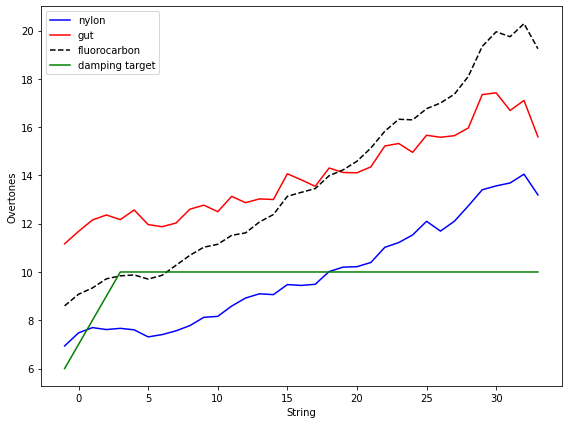

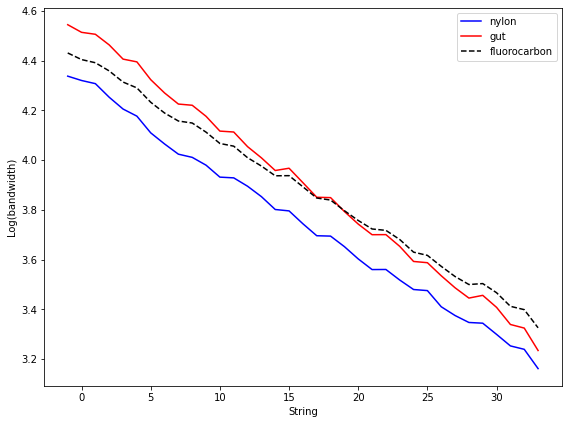

12 :  0.197 m,  10.0 overtones
21 :  0.397 m,  10.0 overtones
26 :  0.599 m,  10.0 overtones
29 :  0.775 m,  10.0 overtones
32 :  0.965 m,  10.0 overtones


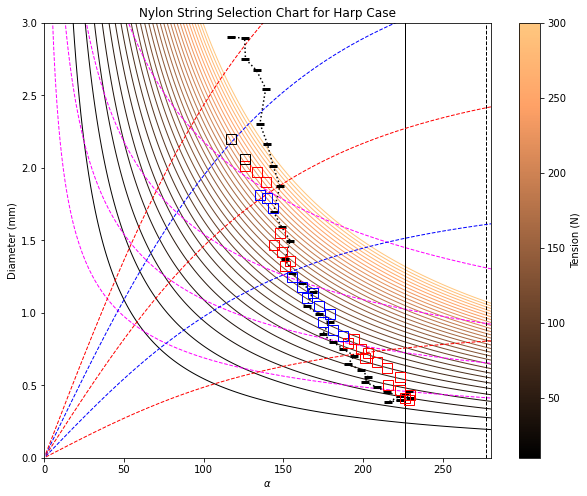

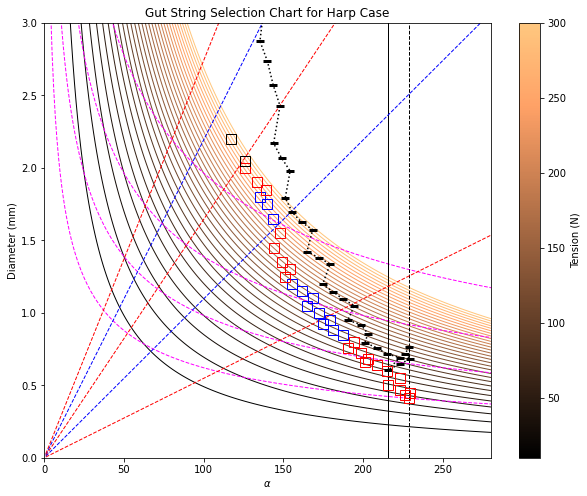

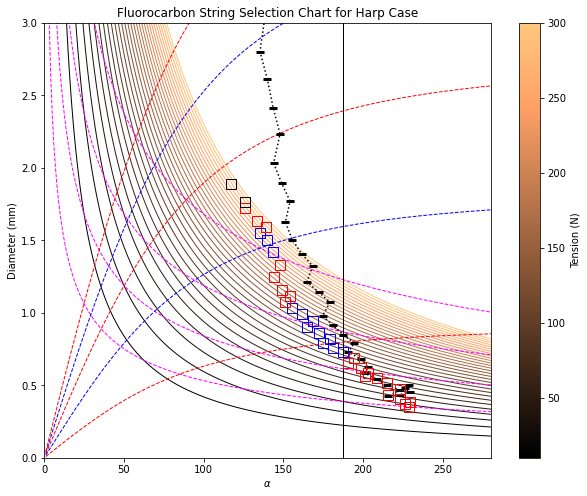

In [8]:
def calc_overtones(frequency, length, diameter, rho, E0, E1):
    lambda_adj = lamda_threshold / (1.0 - lamda_threshold)  ## allows form of eq.(7) to be used in place of eq.(4)
    alpha = length * frequency
    E = E0 + (E1 * 4.0 * alpha * alpha * rho)  # Young's modulus in Pa
    overtones = 8000.0 * length * alpha * np.sqrt(lambda_adj * rho / E) / (np.pi * diameter)
    return overtones

def add_harp_strings(ax, alpha_arr, dia_arr):
    msize=10
    ax.plot(alpha_arr[:13], dia_arr[:13], 'rs', mfc='none', ms=msize)
    ax.plot(alpha_arr[13:22], dia_arr[13:22], 'bs', mfc='none', ms=msize)
    ax.plot(alpha_arr[22:27], dia_arr[22:27], 'rs', mfc='none', ms=msize)
    ax.plot(alpha_arr[27:30], dia_arr[27:30], 'bs', mfc='none', ms=msize)
    ax.plot(alpha_arr[30:33], dia_arr[30:33], 'rs', mfc='none', ms=msize)
    ax.plot(alpha_arr[33:], dia_arr[33:], 'ks', mfc='none', ms=msize)

show_all_damping = True #False

# Read in harp string data
# connect to data source
file_location = "./harp string gauges.xls"
workbook1 = xlrd.open_workbook(file_location)
data_sheet = workbook1.sheet_by_index(0)
str_freq =   np.asarray([data_sheet.cell_value(i, 2) for i in range(4,39)])  # values in Hz
str_length = np.asarray([data_sheet.cell_value(i, 3)/1000.0 for i in range(4,39)])  # values in mm, converted to m
gut_dia =    np.asarray([data_sheet.cell_value(i, 4) for i in range(4,39)])  # values in mm
nylon_dia =  np.asarray([data_sheet.cell_value(i, 5) for i in range(4,39)])  # values in mm
str_alpha = str_freq * str_length

carbon_dia = 0.86 * gut_dia

# material properties
# nylon
rho_n = 1070.0  # density, kg/m^3
E0_n = 4.5e9    # E' fixed part (Pa)
E1_n = 39       # E' stress part (for stress in Pa)
# gut
rho_g = 1320.0  # density, kg/m^3
E0_g = 6.0e9    # E' fixed part (Pa)
E1_g = 0       # E' stress part (for stress in Pa)
# fluorocarbon
rho_c = 1800.0  # density, kg/m^3
E0_c = 3.2e9    # E' fixed part (Pa)
E1_c = 41       # E' stress part (for stress in Pa)


# overtones study
overtones_n = calc_overtones(str_freq, str_length, nylon_dia, rho_n, E0_n, E1_n)
overtones_g = calc_overtones(str_freq, str_length, gut_dia, rho_g, E0_g, E1_g)
overtones_c = calc_overtones(str_freq, str_length, carbon_dia, rho_c, E0_c, E1_c)

target_1 = default_overtones * np.ones_like(str_length)
target_n = np.round(np.minimum(target_1, 20000/str_freq))

x_range = np.arange(-1, 34, 1)
plt.figure(figsize=(8,6))
plt.plot(x_range, overtones_n, 'b-', label='nylon')
plt.plot(x_range, overtones_g, 'r-', label='gut')
plt.plot(x_range, overtones_c, 'k--', label='fluorocarbon')
#plt.plot(x_range, target_1, 'g-', label='damping target')
plt.plot(x_range, target_n, 'g-', label='damping target')
plt.xlabel('String')
plt.ylabel('Overtones')
plt.legend()
plt.tight_layout()  
#plt.savefig('./overtones_harp.png', format='png', dpi=1000)
plt.show()


# bandwidth study
bandwidth_n = overtones_n * str_freq
bandwidth_g = overtones_g * str_freq
bandwidth_c = overtones_c * str_freq

use_logs = True#False
x_range = np.arange(-1, 34, 1)
plt.figure(figsize=(8,6))
if use_logs:
    plt.plot(x_range, np.log10(bandwidth_n), 'b-', label='nylon')
    plt.plot(x_range, np.log10(bandwidth_g), 'r-', label='gut')
    plt.plot(x_range, np.log10(bandwidth_c), 'k--', label='fluorocarbon')
    plt.xlabel('String')
    plt.ylabel('Log(bandwidth)')
else:
    plt.plot(x_range, bandwidth_n, 'b-', label='nylon')
    plt.plot(x_range, bandwidth_g, 'r-', label='gut')
    plt.plot(x_range, bandwidth_c, 'k--', label='fluorocarbon')
    plt.xlabel('String')
    plt.ylabel('Bandwidth')
plt.legend()
plt.tight_layout()  
#plt.savefig('./bandwidth_harp.png', format='png', dpi=1000)
plt.show()


for i in [12,21,26,29,32]:
    print(i, ': ', str_length[i], 'm, ', target_n[i], 'overtones')
    
# Nylon chart
# draw base chart
ax1 = base_string_chart(rho_n)
# alpha limits
ax1.plot([226.5,226.5],[0,3],'k-',lw=1)
ax1.plot([277.2,277.2],[0,3],'k--',lw=1)
# damping limits
add_damping_limit(ax1, 0.2, rho_n, E0_n, E1_n, target_n[12], 'red', '--')
add_damping_limit(ax1, 0.4, rho_n, E0_n, E1_n, target_n[21], 'blue', '--')
add_damping_limit(ax1, 0.6, rho_n, E0_n, E1_n, target_n[26], 'red', '--')
add_damping_limit(ax1, 0.8, rho_n, E0_n, E1_n, target_n[29], 'blue', '--')
add_damping_limit(ax1, 1.0, rho_n, E0_n, E1_n, target_n[32], 'red', '--')
if show_all_damping:
    add_harp_damping_limit(ax1, str_length, str_freq, rho_n, E0_n, E1_n, target_n, 'black', ':', '_', 8, 3)
# string points
add_harp_strings(ax1, str_alpha, nylon_dia)
# add title and finish
ax1.set_title('Nylon String Selection Chart for Harp Case')
#plt.savefig('./nylon_string_selection_chart_harp.eps', format='eps', dpi=1000)
#plt.savefig('./nylon_string_selection_chart_harp.png', format='png', dpi=1000)
plt.show()
    
# Gut chart
# draw base chart
ax1 = base_string_chart(rho_g)
# alpha limits
ax1.plot([215.5,215.5],[0,3],'k-',lw=1)
ax1.plot([229.0,229.0],[0,3],'k--',lw=1)
# damping limits
add_damping_limit(ax1, 0.2, rho_g, E0_g, E1_g, target_n[12], 'red', '--')
add_damping_limit(ax1, 0.4, rho_g, E0_g, E1_g, target_n[21], 'blue', '--')
add_damping_limit(ax1, 0.6, rho_g, E0_g, E1_g, target_n[26], 'red', '--')
add_damping_limit(ax1, 0.8, rho_g, E0_g, E1_g, target_n[29], 'blue', '--')
add_damping_limit(ax1, 1.0, rho_g, E0_g, E1_g, target_n[32], 'red', '--')
if show_all_damping:
    add_harp_damping_limit(ax1, str_length, str_freq, rho_g, E0_g, E1_g, target_n, 'black', ':', '_', 8, 3)
# string points
add_harp_strings(ax1, str_alpha, gut_dia)
# add title and finish
ax1.set_title('Gut String Selection Chart for Harp Case')
#plt.savefig('./gut_string_selection_chart_harp.eps', format='eps', dpi=1000)
#plt.savefig('./gut_string_selection_chart_harp.png', format='png', dpi=1000)
plt.show()
    
# Fluorocarbon chart
# draw base chart
ax1 = base_string_chart(rho_c)
# alpha limits
ax1.plot([187.5,187.5],[0,3],'k-',lw=1)
# damping limits
add_damping_limit(ax1, 0.2, rho_c, E0_c, E1_c, target_n[12], 'red', '--')
add_damping_limit(ax1, 0.4, rho_c, E0_c, E1_c, target_n[21], 'blue', '--')
add_damping_limit(ax1, 0.6, rho_c, E0_c, E1_c, target_n[26], 'red', '--')
add_damping_limit(ax1, 0.8, rho_c, E0_c, E1_c, target_n[29], 'blue', '--')
add_damping_limit(ax1, 1.0, rho_c, E0_c, E1_c, target_n[32], 'red', '--')
if show_all_damping:
    add_harp_damping_limit(ax1, str_length, str_freq, rho_c, E0_c, E1_c, target_n, 'black', ':', '_', 8, 3)
# string points
add_harp_strings(ax1, str_alpha, carbon_dia)
# add title and finish
ax1.set_title('Fluorocarbon String Selection Chart for Harp Case')
#plt.savefig('./carbon_string_selection_chart_harp.eps', format='eps', dpi=1000)
#plt.savefig('./carbon_string_selection_chart_harp.png', format='png', dpi=1000)
plt.show()
